In [1]:
from py_alf import Simulation
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
import default_variables

In [13]:
default_variables.PARAMS_GENERIC["VAR_QMC"]['do_ed'] = True

In [14]:
sims = []
print("dtau values used:")
for dtau in [0.05, 0.1, 0.15]:
    print(dtau)
    sim = Simulation(
        'Hubbard',
        {
        "Model": "Hubbard",
        "Lattice_type": "Square",
        "L1": 2,
        "L2": 1,
        'ham_T': 1.0,
        'ham_U': 4.0,
        'ham_Tperp': 0.0,
        'beta': 2.0,
        "NSweep": 100,
        "NBin": 1000,
        'Dtau': dtau,
        },
        alf_dir='~/Programs/ALF',
        config='intel nompi',
        branch='136-automatic-ed-form-op_t-and-op_v'
    )
    sims.append(sim)

dtau values used:
0.05
0.1
0.15


In [7]:
sims[0].compile()

Checking out branch 136-automatic-ed-form-op_t-and-op_v
Compiling ALF... Done.


In [15]:
for i, sim in enumerate(sims):
    sim.run()

Prepare directory "/home/jonas/Programs/ALF/Hubbard_Hubbard_Square_L1=2_L2=1_T=1.0_U=4.0_Tperp=0.0_Dtau=0.05" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/ALF/Prog/Hubbard.out
Error while running /home/jonas/Programs/ALF/Prog/Hubbard.out.
parameters:
&VAR_Lattice
L1 = 2
L2 = 1
Lattice_type = "Square"
Model = "Hubbard"
/

&VAR_Model_Generic
Checkerboard = True
Symm = True
N_SUN = 2
N_FL = 1
Phi_X = 0.0
Phi_Y = 0.0
Bulk = True
N_Phi = 0
Dtau = 0.05
Beta = 2.0
Projector = False
Theta = 10.0
/

&VAR_Hubbard
Mz = True
ham_T = 1.0
ham_chem = 0.0
ham_U = 4.0
ham_T2 = 1.0
ham_U2 = 4.0
ham_Tperp = 0.0
/

&VAR_QMC
Nwrap = 10
NSweep = 100
NBin = 1000
Ltau = 1
LOBS_ST = 0
LOBS_EN = 0
CPU_MAX = 0.0
Propose_S0 = False
Global_moves = False
N_Global = 1
Global_tau_moves = False
N_Global_tau = 1
Nt_sequential_start = 0
Nt_sequential_end = -1
do_ed = True
/

&VAR_errors
n_skip = 1
N_rebin = 1
N_Cov = 0
/

&VAR_TEMP
N_exchange_steps = 6
N_Tempering_frequency = 10
mpi_per_parameter

Exception: Error while running /home/jonas/Programs/ALF/Prog/Hubbard.out.

In [16]:
ener = np.empty((3, 2))
dtaus = np.empty((3,))
for i, sim in enumerate(sims):
    print(sim.sim_dir)
    sim.analysis()
    dtaus[i] = sim.sim_dict['Dtau']
    ener[i] = sim.get_obs(['Ener_scalJ'])['Ener_scalJ']['obs']

/home/jonas/Programs/pyALF/dt_Mz_0.05
Analysing Part_scal
Analysing Kin_scal
Analysing Ener_scal
Analysing Pot_scal
Analysing SpinT_eq
Analysing SpinZ_eq
Analysing SpinXY_eq
Analysing Green_eq
Analysing Den_eq
Analysing SpinZ_tau
Analysing Den_tau
Analysing SpinXY_tau
Analysing SpinT_tau
Analysing Green_tau
/home/jonas/Programs/pyALF/dt_Mz_0.1
Analysing Part_scal
Analysing Kin_scal
Analysing Ener_scal
Analysing Pot_scal
Analysing SpinT_eq
Analysing SpinZ_eq
Analysing SpinXY_eq
Analysing Green_eq
Analysing Den_eq
Analysing SpinZ_tau
Analysing Den_tau
Analysing SpinXY_tau
Analysing SpinT_tau
Analysing Green_tau
/home/jonas/Programs/pyALF/dt_Mz_0.15
Analysing Part_scal
Analysing Kin_scal
Analysing Ener_scal
Analysing Pot_scal
Analysing SpinT_eq
Analysing SpinZ_eq
Analysing SpinXY_eq
Analysing Green_eq
Analysing Den_eq
Analysing SpinZ_tau
Analysing Den_tau
Analysing SpinXY_tau
Analysing SpinT_tau
Analysing Green_tau


In [17]:
dtaus

array([0.05, 0.1 , 0.15])

In [18]:
ener

array([[-2.681352,  0.009777],
       [-2.843042,  0.010963],
       [-3.159918,  0.013419]])

Energy = -2.6158189598804897+-0.010242288299295287


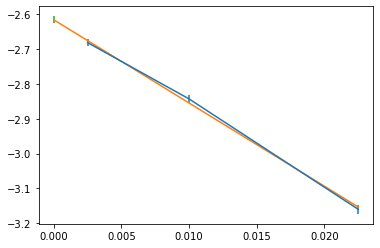

In [19]:
plt.errorbar(dtaus**2, ener[:, 0], ener[:, 1])

def func(x, y0, a):
    return y0 + a*x**2
popt1, pcov = curve_fit(func, dtaus, ener[:, 0], sigma=ener[:, 1], absolute_sigma=True)
perr1 = np.sqrt(np.diag(pcov))
xs = np.linspace(0., dtaus.max())
plt.plot(xs**2, func(xs, *popt1))

plt.errorbar(0, popt1[0], perr1[0])
print('Energy = {}+-{}'.format(popt1[0], perr1[0]))